# Social Network Analysis - Exercise Sheet 5b)


### Multi-Relational Networks (MRGraphs)

In this task, you will work with MRGraphs, compositions of relations and their underlying algebraic structure. You will test and demonstrate your implementations on real world data. For the different tasks below, you can or several data sets, if this makes it easier to demonstrate your implementations.

#### Guidelines
* Submit your code zipped via [moodle](https://moodle.uni-kassel.de/course/view.php?id=11038) until 26.01.2023 23:55 MEZ
* Use the [NetworkX](https://networkx.github.io/documentation/stable/) library for your graphs.

##### Exercise:
1. Think of how MRGraph can be implemented. You can use networkx or implement your own.
2. Think of some example real world MRGraph with three different relations and implement it (load it into the jupyter notebook).
3. Provide or implement some visualization for your MultiGraph.
4. Implement structural equivalence for MRGraphs. Apply this to your graph. What does this show you?
5. Implement the graph composition (compound relation) of two relations. Your implementation should be able to compose  arbitrarily many further relations.
6. Apply the composition to some example in your graph. What are your findings?
6. Implement the Construction Algorithm for MRG induced Semigroups and apply it to your data. Why is this useful?

In [205]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

1. Think of how MRGraph can be implemented. You can use networkx or implement your own.

I use the networkx library which implements the MRGraph and MRDiGraphs. 
The MRGraph is a MultiGraph, which is a graph with multiple edges possible between two nodes. 
(MRDiGraph is a directed graph; analog to MRGraph.)

I use the weight attribute (and give it another name) of the edges to store to which edge set a edge belongs.
Hence, one can have multiple edges between two nodes, but they belong to different edge sets.
The weight attribute can be used to filter the edges by edge set.

Networkx also implements functionalities to display the edge relations (eg. adj).

2. real world MRGraph with three different relations.

People I see in the context of university at different days of the week.

In [206]:
import itertools


students = ['Marco', 'Lukas', 'Daniel', 'Klara', 'Ben', 'Henry', 'Aleyna']
professors = ['Prof. Stumme', 'Prof. Sick']
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']

MG = nx.MultiGraph()
MG.add_edges_from([student_pair for student_pair in itertools.combinations(students[-4:], 2)], day=days[0])
MG.add_edges_from([(professors[1], student) for student in students[-4:]], day=days[0])

MG.add_edges_from([student_pair for student_pair in itertools.combinations(students, 2)], day=days[1])
MG.add_edges_from([(professors[0], student) for student in students[:3]], day=days[1])
MG.add_edges_from([(professors[1], student) for student in students[-4:]], day=days[1])

MG.add_edges_from([student_pair for student_pair in itertools.combinations(students, 2)], day=days[2])
MG.add_edges_from([(professors[0], student) for student in students[:3]], day=days[2])
MG.add_edges_from([(professors[1], student) for student in students[-4:]], day=days[2])

MG.add_edges_from([student_pair for student_pair in itertools.combinations(students[:3], 2)], day=days[4])
MG.add_edges_from([(professors[0], student) for student in students[:3]], day=days[4])

friday_students = [students[i] for i in  range(1,len(students),2)]
MG.add_edges_from([student_pair for student_pair in itertools.combinations(friday_students, 2)], day=days[4])

[2, 2, 3]

In [207]:
print(MG.edges(data="day", keys=False))
print(MG.adj)

[('Klara', 'Ben', 'Monday'), ('Klara', 'Ben', 'Tuesday'), ('Klara', 'Ben', 'Wednesday'), ('Klara', 'Henry', 'Monday'), ('Klara', 'Henry', 'Tuesday'), ('Klara', 'Henry', 'Wednesday'), ('Klara', 'Henry', 'Friday'), ('Klara', 'Aleyna', 'Monday'), ('Klara', 'Aleyna', 'Tuesday'), ('Klara', 'Aleyna', 'Wednesday'), ('Klara', 'Prof. Sick', 'Monday'), ('Klara', 'Prof. Sick', 'Tuesday'), ('Klara', 'Prof. Sick', 'Wednesday'), ('Klara', 'Marco', 'Tuesday'), ('Klara', 'Marco', 'Wednesday'), ('Klara', 'Lukas', 'Tuesday'), ('Klara', 'Lukas', 'Wednesday'), ('Klara', 'Lukas', 'Friday'), ('Klara', 'Daniel', 'Tuesday'), ('Klara', 'Daniel', 'Wednesday'), ('Ben', 'Henry', 'Monday'), ('Ben', 'Henry', 'Tuesday'), ('Ben', 'Henry', 'Wednesday'), ('Ben', 'Aleyna', 'Monday'), ('Ben', 'Aleyna', 'Tuesday'), ('Ben', 'Aleyna', 'Wednesday'), ('Ben', 'Prof. Sick', 'Monday'), ('Ben', 'Prof. Sick', 'Tuesday'), ('Ben', 'Prof. Sick', 'Wednesday'), ('Ben', 'Marco', 'Tuesday'), ('Ben', 'Marco', 'Wednesday'), ('Ben', 'Lukas'

In [208]:
def visualize_multigraphs(MG: nx.MultiGraph, edge_name_distiguisher: str = 'day', relation_names=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']):
    pos = nx.random_layout(MG)
    nx.draw_networkx_nodes(MG, pos, node_color = 'b', node_size = 100, alpha = 1)

    colour_map = {day:['g','b','r','y','orange'][colour] for colour, day in enumerate(relation_names)}
    print(colour_map)

    ax = plt.gca()
    # https://networkx.org/documentation/latest/auto_examples/drawing/plot_chess_masters.html#sphx-glr-auto-examples-drawing-plot-chess-masters-py
    label_options = {"ec": "k", "fc": "white", "alpha": 0.7}
    nx.draw_networkx_labels(MG, pos, font_size=8, bbox=label_options)
    # https://stackoverflow.com/questions/14943439/how-to-draw-multigraph-in-networkx-using-matplotlib-or-graphviz
    for e in MG.edges(data=edge_name_distiguisher, keys=True):
       
        start = pos[e[0]]   # (x,y)
        end = pos[e[1]]    # (x,y)
        day = e[3]
        ax.annotate('',#day,
                    xy=start, xycoords='data',
                    xytext=end, textcoords='data',
                    size=8,
                    arrowprops=dict(arrowstyle="->", color=colour_map[day],
                                    shrinkA=5, shrinkB=5,
                                    patchA=None, patchB=None,
                                    alpha=0.4,
                                    connectionstyle="arc3,rad=rrr".replace('rrr',str(0.3*e[2])
                                    ),
                                    ),
                    )
    plt.axis('off')
    for day in relation_names:
        plt.scatter([],[], c=colour_map[day], label=day)
 
    plt.legend()

    plt.show()

{'Monday': 'g', 'Tuesday': 'b', 'Wednesday': 'r', 'Thursday': 'y', 'Friday': 'orange'}


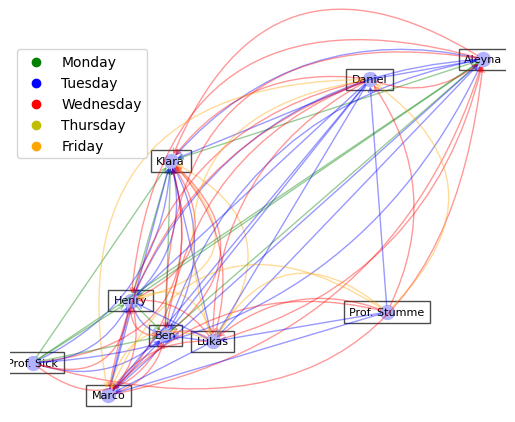

In [209]:
visualize_multigraphs(MG, edge_name_distiguisher= 'day')

4. Structural equivalence

In [ ]:
def check_structural_equivalence(graph, v, w):
    '''
    :param graph: a networkx MRgraph
    :param v: a node in graph
    :param w: a node in graph
    
    :return: True if v and w are structurally equivalent (Def. 9.10), False otherwise
    '''
    adj = graph.adj
    # TODO: iterate over all weights and check neighbours
    return set(graph.neighbors(v)) == set(graph.neighbors(w))